# objektivitas : diberikan data historis pelanggan dealer mobil yang tertarik / membeli dan tidak tertarik / tidak jadi beli mobil. data terdiri dari berbagai macam fitur.
==============================
# Tugas clustering (unsupervised Learning) adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label (apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak)
#### 1. reduksi dimensi ~ mengurangi jumlah fitur atau kolom tanpa menghilangkan informasi dari dataset, supaya proses ML lebih cepat dan simpel
#### 2. mengelompokkan data pelanggan / mencari struktur data
==============================
#### penjelasan data kolom
##### 1. id : identitas pelanggan yang terdaftar
##### 2. jenis_kelamin : jenis kelamin
##### 3. umur : umur
##### 4. SIM : kepemilikan SIM
##### 5. kode daerah : kode daerah tempat tinggal pelanggan
##### 6. sudah_asuransi : sudah pernah asuransi / belum
##### 7. umur_kendaraan : umur kendaraan
##### 8. kendaraan_rusak : mobil pelanggan pernah rusak ato belum
##### 9. premi : jumlah premi yang harus dibayarkan per tahun
##### 10. kanal_penjualan : kode kanal untuk menghubungi pelanggan (email, telpon, dll)
##### 11. lama_berlangganan : durasi pelanggan menjadi klien perusahaan
##### 12. tertarik : tertarik ato ga

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\ASUS\anaconda3\envs\time_series\python.exe"
  * The NumPy version is: "1.21.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


In [ ]:
# Load data training
dataTrain = pd.read_csv('kendaraan_train.csv')
dataTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


## DROP UNIMPORTANT COLUMN (DATA CLEANING)

In [ ]:
# Drop column tertarik ~ karena tugasnya tentang unsupervised
dataTrain_Unlabel = dataTrain.drop(['Tertarik'], axis = 1)
dataTrain_Unlabel.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


Seperti pada fitur “Id” yang hanya merupakan primary key dari dataset (untuk membedakan setiap datanya) dan fitur “SIM” karena jika diteliti, hampir 99% data pada fitur “SIM” memiliki nilai yang sama, yaitu 1 / pelanggan mempunyai SIM. 

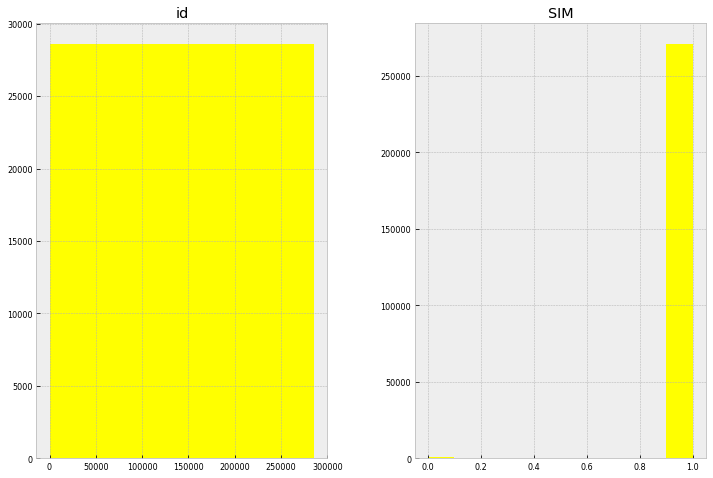

In [ ]:
cols = ['id','SIM']
dataTrain_Unlabel[cols].hist(figsize=(12,8), bins=10, xlabelsize=8, ylabelsize=8, color='yellow');

In [ ]:
dataTrain_Unlabel = dataTrain_Unlabel.drop(['id'], axis = 1)
dataTrain_Unlabel = dataTrain_Unlabel.drop(['SIM'], axis = 1)
dataTrain_Unlabel.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [ ]:
# melihat berapa banyak total kategori pada masing-masing kolom
dataTrain_Unlabel.nunique()

Jenis_Kelamin            2
Umur                    66
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                45114
Kanal_Penjualan        151
Lama_Berlangganan      290
dtype: int64

Karena untuk kolom Jenis_kelamin, Sudah_Asuransi, umur_kendaraan, kendaraan_rusak hanya memiliki 2-3 nilai kategori. saya memutuskan untuk mengdrop kolom tersebut supaya tidak menganggu proses normalisasi

In [ ]:
dataTrain_Unlabel = dataTrain_Unlabel.drop(['Jenis_Kelamin'], axis = 1)
dataTrain_Unlabel = dataTrain_Unlabel.drop(['Sudah_Asuransi'], axis = 1)
dataTrain_Unlabel = dataTrain_Unlabel.drop(['Umur_Kendaraan'], axis = 1)
dataTrain_Unlabel = dataTrain_Unlabel.drop(['Kendaraan_Rusak'], axis = 1)
dataTrain_Unlabel

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


In [ ]:
# reset index
dataTrain_Unlabel.reset_index(inplace=True,drop=True)

## DROP DATA WITH NAN VALUE / ISI MENGGUNAKAN bfill, mean, modus di experimen

In [ ]:
dataTrain_Unlabel.isna().sum()

Umur                 14214
Kode_Daerah          14306
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
# list berapa banyak feature yang tidak termasuk NaN
dataTrain_Unlabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   Kode_Daerah        271525 non-null  float64
 2   Premi              271262 non-null  float64
 3   Kanal_Penjualan    271532 non-null  float64
 4   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(5)
memory usage: 10.9 MB


In [ ]:
#Finding Missing values percentage in all columns
miss = pd.DataFrame(dataTrain_Unlabel.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(dataTrain.index))*100
miss

,miss_count,miss_%
Umur,14214,4.972869
Kode_Daerah,14306,5.005055
Premi,14569,5.097068
Kanal_Penjualan,14299,5.002606
Lama_Berlangganan,13992,4.895200


In [ ]:
# menuliskan berapa banyak rows pada dataframe sebelum NaN value di drop
index = dataTrain_Unlabel.index
rows_before = len(index)
rows_before

285831

In [ ]:
# drop data yang ada NaN value nya
dataTrain_Unlabel.dropna(inplace = True)
# reset index
dataTrain_Unlabel.reset_index(inplace=True,drop=True)
# show data
dataTrain_Unlabel.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0


In [ ]:
# menuliskan berapa banyak rows pada dataframe setelah NaN value di drop
index = dataTrain_Unlabel.index
rows_after = len(index)
rows_after

221199

In [ ]:
persentase_drop = ((rows_before - rows_after)/rows_before)*100
persentase_drop

22.611963013109147

In [ ]:
# dataTrain.isnull().sum().sum()
dataTrain_Unlabel

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
221194,23.0,4.0,25988.0,152.0,217.0
221195,21.0,46.0,44686.0,152.0,50.0
221196,23.0,50.0,49751.0,152.0,226.0
221197,68.0,7.0,30503.0,124.0,270.0


## NORMALIZATION

In [ ]:
# menggunakan min-max normalization ~ dalam nilai 0 - 1
dataTrain_Normal = dataTrain_Unlabel.copy()
for i in dataTrain_Unlabel.columns:
    dataTrain_Normal[i] = (dataTrain_Unlabel[i] - dataTrain_Unlabel[i].min()) / (dataTrain_Unlabel[i].max() - dataTrain_Unlabel[i].min())

In [ ]:
dataTrain_Normal.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.047251,0.932099,0.301038
1,0.430769,0.750000,0.043104,0.172840,0.512111
2,0.015385,0.884615,0.056002,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.059953,0.537037,0.636678


## FIND OUTLIERS VALUE

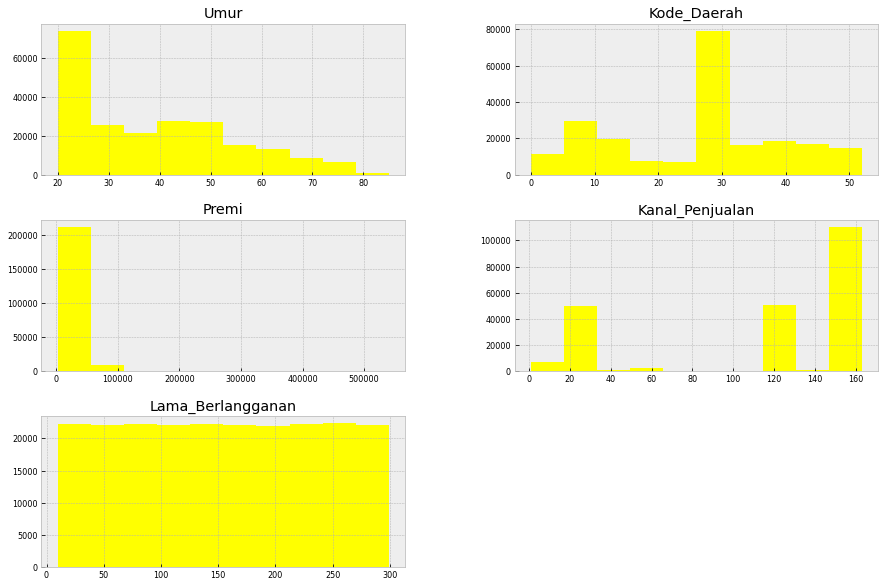

In [ ]:
dataTrain_Unlabel.hist(figsize=(15,10), bins=10, xlabelsize=8, ylabelsize=8, color='yellow');

#### note : visualisasi distribusi hanya berlaku untuk melihat kolom umur, premi, dan lama berlangganan. sisanya merupakan data kategorial.

<AxesSubplot:ylabel='Kanal_Penjualan'>

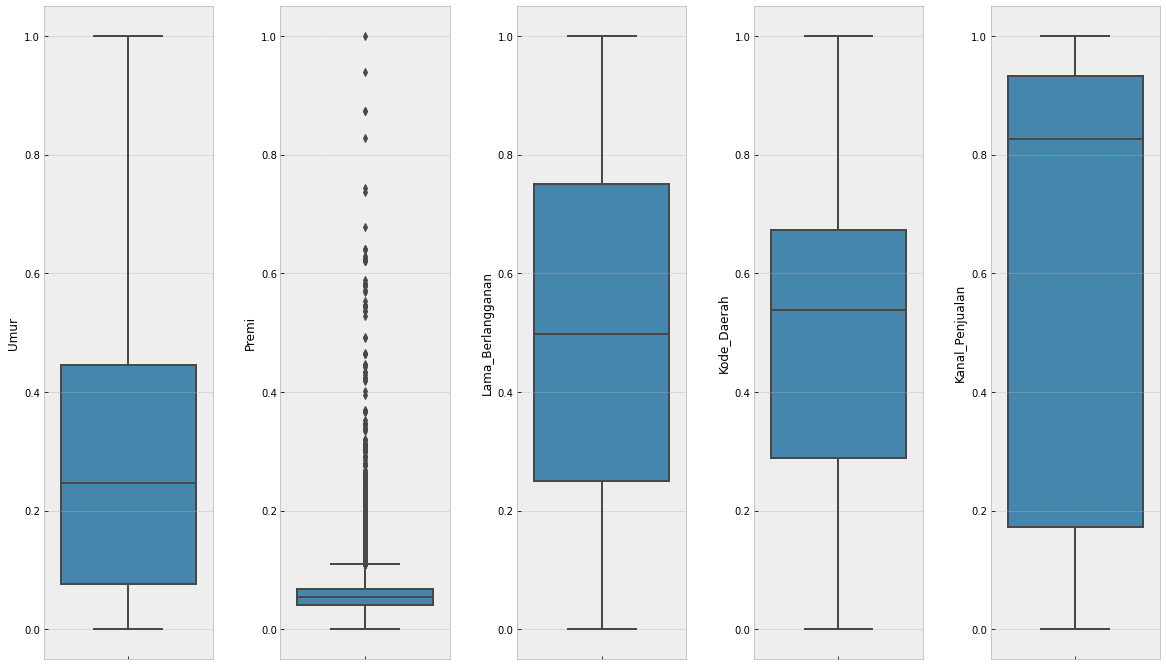

In [ ]:
# membuat boxplot untuk melihat outliers, hanya pada kolom Premi, Umur, dan Lama_Berlangganan 
# (karena merupakan data numerik ~ diskrit / kontinu), sisanya merupakan kolom data kategorial.
f, axes = plt.subplots(1,5, figsize=(20,12), gridspec_kw={'wspace': 0.4, 'hspace':0.4})

sns.boxplot(y=dataTrain_Normal['Umur'], orient='v', ax=axes[0])
sns.boxplot(y=dataTrain_Normal['Premi'], orient='v', ax=axes[1])
sns.boxplot(y=dataTrain_Normal['Lama_Berlangganan'], orient='v', ax=axes[2])
sns.boxplot(y=dataTrain_Normal['Kode_Daerah'], orient='v', ax=axes[3])
sns.boxplot(y=dataTrain_Normal['Kanal_Penjualan'], orient='v', ax=axes[4])

HASIL : outliers pada kolom premi, merupakan outlier yang normal karena premi hanya merupakan biaya yang harus dibayar pertahun

# MODELING -> menggunakan K-means clustering

In [ ]:
np.random.seed(42)

# perhitungan jarak menggunakan formula euclidian
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class Kmeans:
    # konstruktor
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list untuk poin-poin data pada masing-masing kluster
        self.clusters = [[] for _ in range(self.K)]
        # centroid untuk masing-masing kluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # inisialisasi centroid awal. centroid awal diletakkan secara random
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # looping sampai proses klusterisasi sudah optimal / tidak terjadi perpindahan centroid
        for _ in range(self.max_iters):
            # membuat kluster / untuk masing-masing data poin memilih centroid terdekat
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # mencari centroid baru di setiap kluster
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # cek apakah posisi centroid masih berubah
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # meng-klasifikasikan kluster masing-masing data poin 
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # setiap sampel akan mendapatkan label dari cluster yang didapat
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign sampel ke centroid terdekat untuk membuat cluster
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # return jarak sampel saat ini ke setiap centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign nilai rata-rata cluster ke centroid
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # jarak antara masing-masing centroid lama dan baru, untuk semua centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

## Reduksi Dimensi menggunakan PCA (diexperimen pertama)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
dataTrain_Normal.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.047251,0.932099,0.301038
1,0.430769,0.750000,0.043104,0.172840,0.512111
2,0.015385,0.884615,0.056002,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.059953,0.537037,0.636678


In [ ]:
# kita membuat class PCA() dengan memberikan parameter n_components yang mendefinisikan jumlah komponen 
# atau kolom baru yang diinginkan.
pca = PCA(n_components=2)

In [ ]:
fit_pca = pca.fit_transform(dataTrain_Normal)

In [ ]:
df_pca = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
df_pca.head()

,PCA_1,PCA_2
0,-0.272957,-0.200354
1,0.529372,0.010251
2,-0.368520,-0.127250
3,0.107200,-0.320851
4,0.223982,0.135387


In [ ]:
# Karena terdapat nilai yang negatif, maka harus dinormalisasi terlebih dahulu
# menggunakan min-max normalization ~ dalam nilai 0 - 1
dfPca_Normal = df_pca.copy()
for i in df_pca.columns:
    dfPca_Normal[i] = (df_pca[i] - df_pca[i].min()) / (df_pca[i].max() - df_pca[i].min())

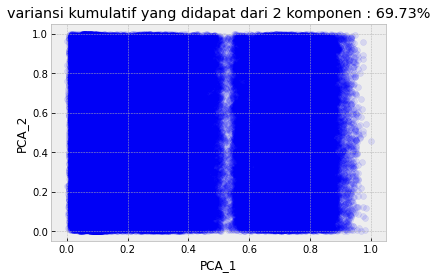

In [ ]:
# Plot PCA
plt.scatter(dfPca_Normal['PCA_1'], dfPca_Normal['PCA_2'], alpha= .1, color='blue')
plt.title("variansi kumulatif yang didapat dari 2 komponen : {:.2%}".format(np.sum(pca.explained_variance_ratio_)))
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [ ]:
dfPca_Normal

,PCA_1,PCA_2
0,0.121965,0.301300
1,0.705098,0.509401
2,0.052510,0.373534
3,0.398263,0.182236
4,0.483140,0.633048
...,...,...
221194,0.057927,0.717824
221195,0.083859,0.137676
221196,0.098267,0.738536
221197,0.417899,0.898991


In [ ]:
dataFinal = dfPca_Normal.to_numpy()
dataFinal.shape

(221199, 2)

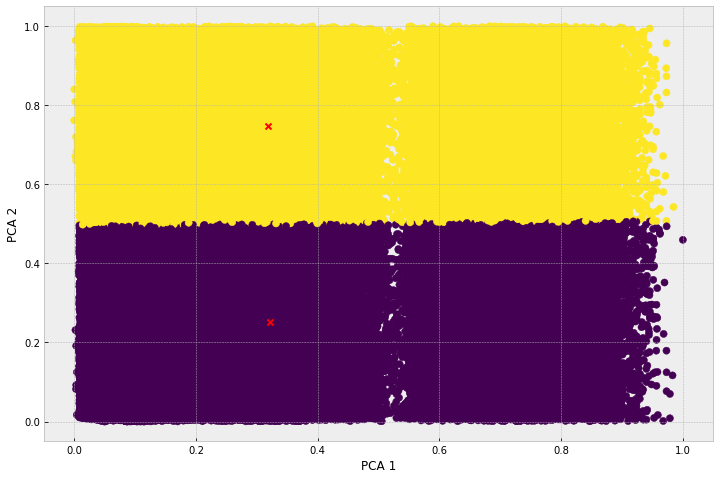

In [ ]:
# K = 2
model = Kmeans(K=2, max_iters=10)
predik = model.predict(dataFinal)
predik
plt.figure(figsize=(12,8))
plt.scatter(dataFinal[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

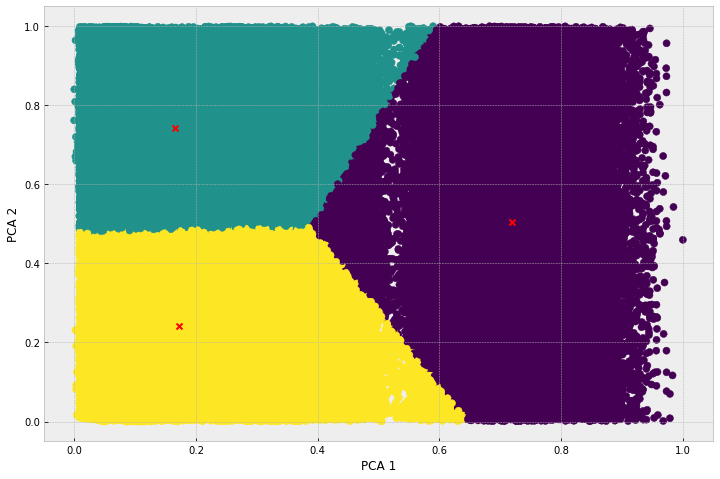

In [ ]:
# K = 3
model = Kmeans(K=3, max_iters=10)
predik = model.predict(dataFinal)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

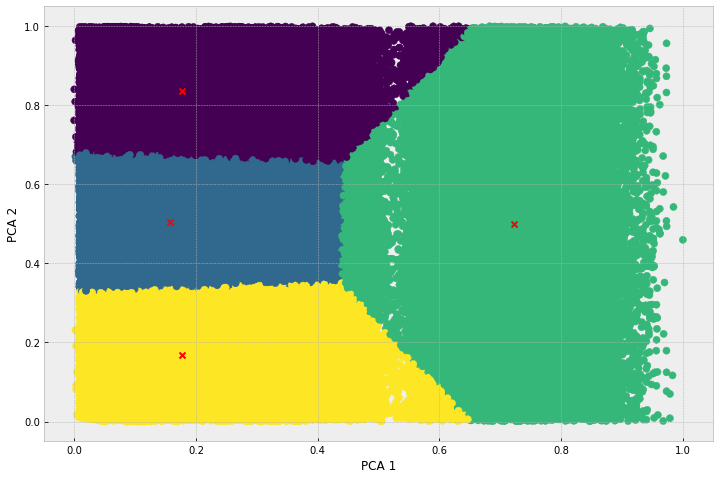

In [ ]:
model = Kmeans(K=4, max_iters=10)
predik = model.predict(dataFinal)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

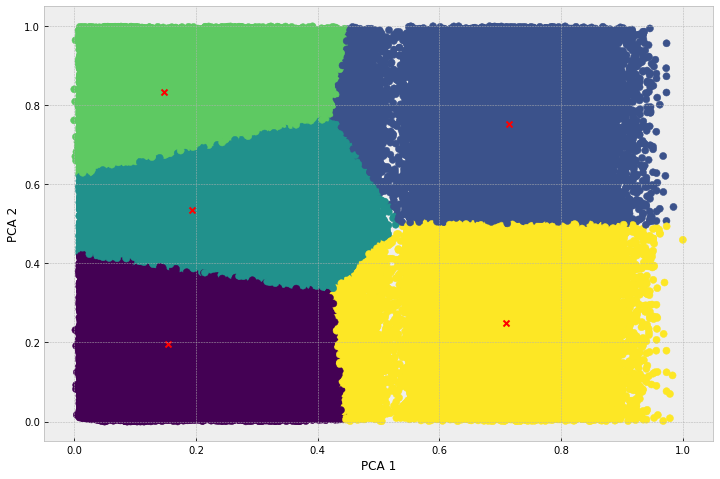

In [ ]:
model = Kmeans(K=5, max_iters=10)
predik = model.predict(dataFinal)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## FIND CORRELATION (experimen kedua) ~ menggunakan pasangan kolom dengan korelasi paling positif ataupun negatif

In [ ]:
# dataTrain_Unlabel # belum di normalisasi
# dataTrain_Normal # sudah dinormalisasi
# reset index
dataTrain_Normal.reset_index(inplace=True,drop=True)
dataTrain_Normal.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.047251,0.932099,0.301038
1,0.430769,0.750000,0.043104,0.172840,0.512111
2,0.015385,0.884615,0.056002,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.059953,0.537037,0.636678


In [ ]:
# untuk mencari korelasi, kita menggunakan dfNum_Unlabel
df1_corr = dataTrain_Normal.corr()
df1_corr

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
Umur,1.000000,0.044031,0.063716,-0.577513,0.000117
Kode_Daerah,0.044031,1.000000,-0.012261,-0.043869,-0.003012
Premi,0.063716,-0.012261,1.000000,-0.111770,-0.001510
Kanal_Penjualan,-0.577513,-0.043869,-0.111770,1.000000,0.000141
Lama_Berlangganan,0.000117,-0.003012,-0.001510,0.000141,1.000000


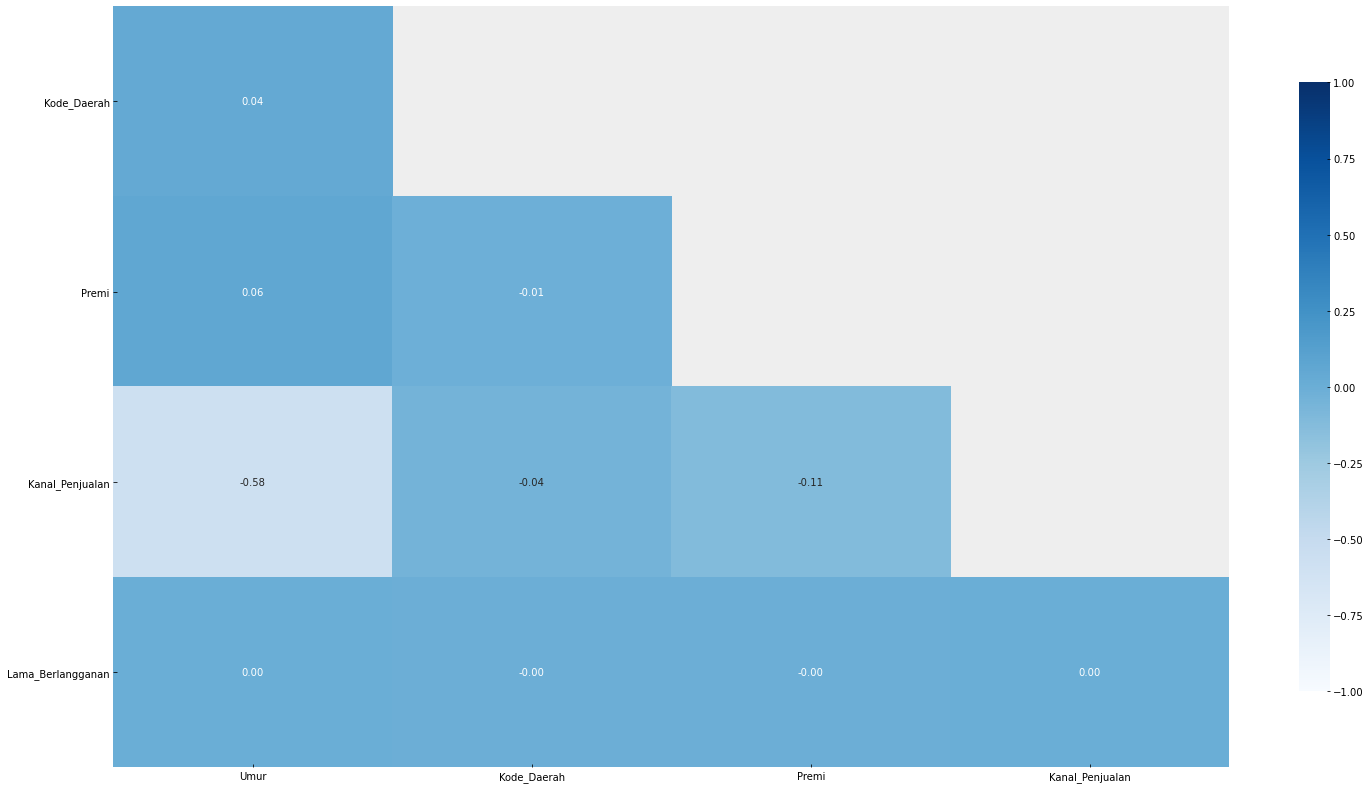

In [ ]:
# edit the correlation visualization with mask
# np.ones_like can create a matrix of booleans with the same shape as our data frame
np.ones_like(df1_corr, dtype=np.bool)
# while np.triu will return only the upper triangle of that matrix.
mask = np.triu(np.ones_like(df1_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df1_corr.iloc[1:,:-1].copy()
# plot heatmap
fig, ax = plt.subplots(figsize=(25, 14))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
dataTrain_Normal.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.047251,0.932099,0.301038
1,0.430769,0.750000,0.043104,0.172840,0.512111
2,0.015385,0.884615,0.056002,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.059953,0.537037,0.636678


### mengambil kolom premi dan umur sebagai data input ke dalam model

In [ ]:
cols = ['Umur','Premi']
df_exp2 = dataTrain_Normal[cols]
df_exp2.head()

,Umur,Premi
0,0.153846,0.047251
1,0.430769,0.043104
2,0.015385,0.056002
3,0.584615,0.000000
4,0.461538,0.059953


In [ ]:
dataFinal2 = df_exp2.to_numpy()
dataFinal2.shape

(221199, 2)

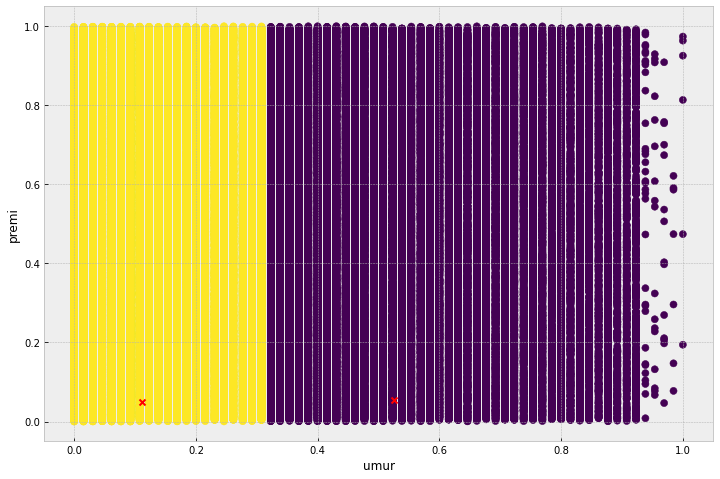

In [ ]:
model = Kmeans(K=2, max_iters=10)
predik = model.predict(dataFinal2)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal2[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('umur')
plt.ylabel('premi')
plt.show()

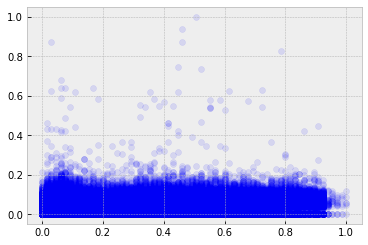

In [ ]:
plt.scatter(df_exp2['Umur'], df_exp2['Premi'], alpha= .1, color='blue')

HASIL : pada eksperimen menggunakan fitur umur dan premi, hasil klusterisasi, sudah cukup baik dalam mengelompokkan data, namun, hasil klusterisasi diatas tidak begitu padat dan simetris jika kita bandingkan dengan hasil kluster pada eksperimen pertama (Ketika menggunakan fitur hasil reduksi dimensi sebagai data input), selain itu, juga plot sebelum dan sesudah klusterisasi tidak sama atau tidak representasi dengan satu sama lain. 

### mengambil kolom kanal_penjualan dan umur sebagai data input ke dalam model

In [ ]:
cols = ['Umur','Kanal_Penjualan']
df_exp2a = dataTrain_Normal[cols]
df_exp2a.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.584615,0.759259
4,0.461538,0.537037


In [ ]:
dataFinal2a = df_exp2a.to_numpy()
dataFinal2a.shape

(221199, 2)

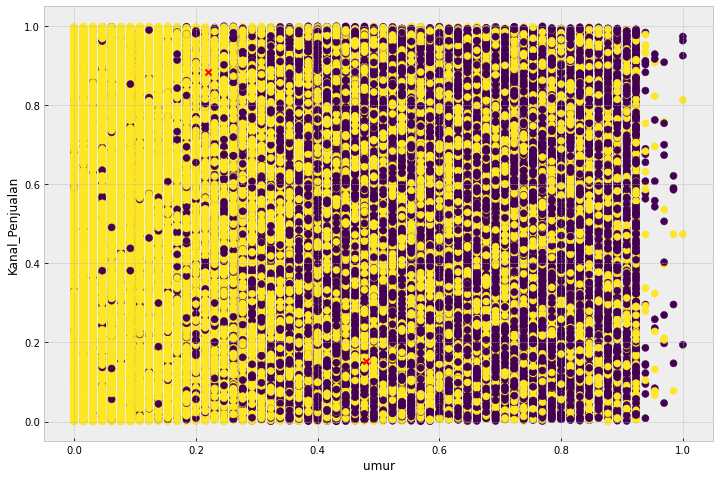

In [ ]:
model = Kmeans(K=2, max_iters=10)
predik = model.predict(dataFinal2a)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal2a[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('umur')
plt.ylabel('Kanal_Penjualan')
plt.show()

HASIL : Dari hasil klusterisasi diatas, dapat kita simpulkan bahwa proses klusterisasi diatas membutuhkan iterasi klusterisasi yang lebih banyak. Atau dengan kata lain membutuhkan waktu dan proses yang lebih Panjang dari proses klusterisasi di eksperimen lainnya. 

## evaluation

to find optimum number of clusters use ELBOW METHOD

In [ ]:
from sklearn.cluster import KMeans

### experimen pertama, modeling menggunakan data input fitur hasil reduksi dimensi 

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataFinal)
    distortions.append(kmeanModel.inertia_)

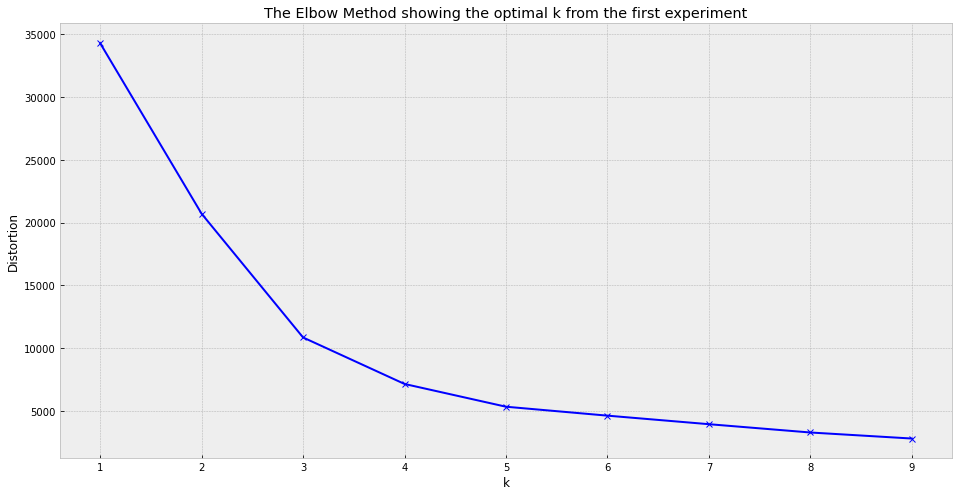

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k from the first experiment')
plt.show()

# Kesimpulan :
### Dari semua eksperimen yang dilakukan, hasil klusterisasi yang paling optimal adalah klusterisasi dengan nilai K = 3, dengan data input adalah fitur hasil reduksi dimensi menggunakan PCA (Principal Component Analysis)

In [ ]:
# Catatan :
# dataTrain_Unlabel (DataTrain yang belum di normalisasi)
# dataTrain_Normal  (DataTrain yang sudah di normalisasi)
# dfPca_Normal      (DataTrain hasil dari reduksi dimensi untuk eksperimen pertama)
# df_exp2           (DataTrain yang terdiri dari fitur umur dan fitur premi, untuk eksperimen kedua)      
# df_exp2a          (DataTrain yang terdiri dari fitur umur dan fitur Kanal_kendaraan, untuk eksperimen kedua)

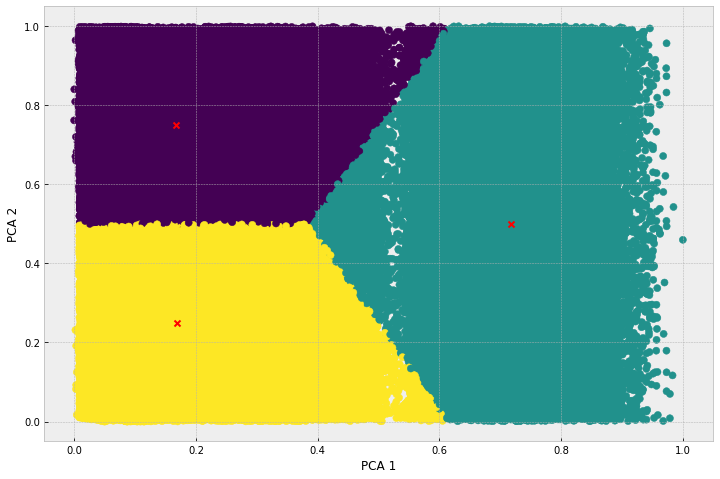

In [ ]:
# K = 3
model = Kmeans(K=3, max_iters=10)
predik = model.predict(dataFinal)

plt.figure(figsize=(12,8))
plt.scatter(dataFinal[:,0], dataFinal[:,1], c=predik, s=50)

centroid = model.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='x', linewidth=2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## hasil : dataset yang sudah ada hasil klusterisasinya 

In [ ]:
dataTrain_Unlabel['kluster'] = predik
dataTrain_Unlabel

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan,kluster
0,30.0,33.0,28029.0,152.0,97.0,2.0
1,48.0,39.0,25800.0,29.0,158.0,1.0
2,21.0,46.0,32733.0,160.0,119.0,2.0
3,58.0,48.0,2630.0,124.0,63.0,2.0
4,50.0,35.0,34857.0,88.0,194.0,1.0
...,...,...,...,...,...,...
221194,23.0,4.0,25988.0,152.0,217.0,0.0
221195,21.0,46.0,44686.0,152.0,50.0,2.0
221196,23.0,50.0,49751.0,152.0,226.0,0.0
221197,68.0,7.0,30503.0,124.0,270.0,0.0
